In [1]:
from energymercato.setup.starting import SpotSetup, RealTimeSetup

creation of specific plant for France


In [3]:
path = "/mnt/g/Mon Drive/Cours/2025/SEM SGB/energymercato/"
# G:\Mon Drive\Cours\2025\SEM SGB
# path = "./usetests/try/"
spot = SpotSetup(path, 
                 solo=False,
                 client_price=60,
                 penalty_price_j1=300,
                 arenh_price=50,
                 arenh_proportion=.25
                 )

path  /mnt/g/Mon Drive/Cours/2025/SEM SGB is existing ? True
Initialization of SPOT Market with parameters :
- legal client price : 60€
penalty price for J-1 : 300€/MWh
ARENH Price and volume proportion: 50€/MWh / 0.25%


In [5]:
from datetime import datetime
# Setup game
spot.generate_players()
spot.simulate_game_data(dt = datetime(2025,1,4), p_max_margin=.85)

defining players...
Power consumption is taken on Pmax = 48332.7 = self.total_power-self.total_power_enr)*0.85


In [6]:
spot.change_round_day()

Welcome in the SPOT Market of day 2025-01-05 !
Simulating weather and consumption...
...ok
Writing to file


<Axes: >

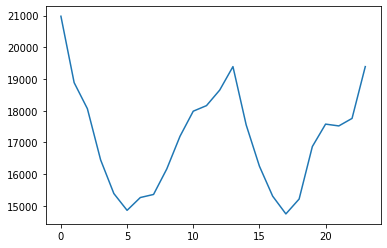

In [7]:
spot.plot_conso()

In [8]:
spot.d_fixing

AttributeError: 'SpotSetup' object has no attribute 'd_fixing'

Fixing market automatic process...
waiting for filling...


/home/projects/energymercato/energymercato/venv/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/projects/energymercato/energymercato/venv/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<Axes: xlabel='cumsum_p_max'>

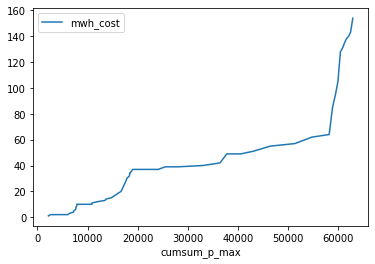

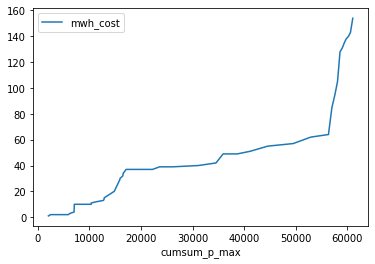

In [9]:
spot.fix_market()
spot.plot_fixing(12)
spot.plot_fixing(1)

In [10]:
from pathlib import Path

import pandas as pd


def check_j_prev(path):
    path = Path(path)
    
    try:
        if not path.exists():
            raise FileNotFoundError

        dj = pd.read_csv(path, sep=";")
        if not all(item in dj.columns for item in ['hour','Name','type', 'p_min', 'p_max', 'mwh_cost', 'p'] ):
            for item in ['hour','Name','type', 'p_min', 'p_max', 'cost', 'mwh_cost', 'p']:
                if not item in dj.columns:
                    print(item)
            raise ValueError("Columns not all in ['hour', 'Name','type', 'p_min', 'p_max', 'mwh_cost', 'p']" )
        return dj
    except (ValueError,FileNotFoundError):
        print("error")

def check_j_market_cmd(path):
    path = Path(path)
    
    try:
        if not path.exists():
            raise FileNotFoundError

        dj = pd.read_csv(path, sep=";")
        if not all(item in dj.columns for item in ["mwh_price","hour","buy_mwh"] ):
            for item in ["mwh_price","hour","buy_mwh"]:
                if not item in dj.columns:
                    print(item)
            raise ValueError("Columns not all in 'mwh_price','hour'','buy_mwh'" )
        return dj
    except (ValueError,FileNotFoundError):
        print("check error")

In [103]:
ppp = "totalnrj"
print(check_j_prev(path+ppp+"/"+ppp+"_j_prev.csv"))
print(check_j_market_cmd(path+ppp+"/"+ppp+"_j_cmd.csv"))

              Name        type  p_min   p_max  mwh_cost  hour  p
0            t_sol  SolarPlant    0.0     0.0         6     0  0
1           t_wind   WindPlant    0.0  3973.0        12     0  0
2    alpiq_hydro_3  HydroPlant    0.0    30.0        34     0  0
3       marcinelle    GasPlant  100.0   450.0       154     0  0
4            bayet    GasPlant   80.0   360.0       138     0  0
..             ...         ...    ...     ...       ...   ... ..
163  alpiq_hydro_3  HydroPlant    0.0    31.0        34    23  0
164     marcinelle    GasPlant  100.0   450.0       154    23  0
165          bayet    GasPlant   80.0   360.0       138    23  0
166           fos3    GasPlant  108.0   486.0       128    23  0
167       camargue  SolarPlant    0.0     0.0         5    23  0

[168 rows x 7 columns]
    mwh_price  hour  buy_mwh
0          51     0        0
1          49     1        0
2          42     2        0
3          49     3        0
4          42     4        0
5          42     5   

In [104]:
spot.read_prev_from_players()

ok for production orders
ok for market orders


In [105]:
spot.compute_scores()

In [106]:
spot.get_scores()

Let's play for Real Time !

In [107]:
from energymercato.setup.starting import save, load
save(spot,"usetests/data/spot_240505.pkl")
# spot = load("usetests/data/spot.pkl")

In [ ]:
# import pickle


# with open("usetests/data/spot.pkl", 'rb') as outp:
#     o = pickle.load(outp)

In [108]:
realtime = RealTimeSetup(spot,spot_price = 150, transaction_price = 1000)

Initialization of Real Time Market with parameters:
- Real time spot price: 150
- Transaction price: 1000
ready for next phase


In [114]:
realtime.start_spot()

 Welcome in the Real Time Market of day 2024-06-06 at 1h !
Real consumption = 46345
Real Production = 38899
Balance = 7446
Go to spot file and fill spot column with adjustment to reach balance = 0
Ready for balancing
 Difference of Real Consumption with SPOT is 7446


In [115]:
realtime.read_spot()

Balance was 7446. It is now 7446
Balance is not adjusted


In [116]:
realtime.wait_for_adjustment(.25, 20)

You have 0.25 x 20 minutes before blackout
Tic, Toc... Blackout is coming : 1x0.25 min already spent
Balance was 7446. It is now 7446
Balance is not adjusted
Balance left : 7446
Tic, Toc... Blackout is coming : 2x0.25 min already spent
Balance was 7446. It is now 7446
Balance is not adjusted
Balance left : 7446
Tic, Toc... Blackout is coming : 3x0.25 min already spent
Some players are trying to get down the system...
11    cnr
Name: player, dtype: object
This is a warning, DGSE has been warned
Balance left : 7446
Tic, Toc... Blackout is coming : 4x0.25 min already spent
Some players are trying to get down the system...
11    cnr
Name: player, dtype: object
This is a warning, DGSE has been warned
Balance left : 7446
Tic, Toc... Blackout is coming : 5x0.25 min already spent
Some players are trying to get down the system...
18    gazel
Name: player, dtype: object
This is a warning, DGSE has been warned
Balance left : 7446
Tic, Toc... Blackout is coming : 6x0.25 min already spent
Some play

In [117]:
realtime.compute_score()

 End of SPOT for hour 1
Please start for next hour


In [118]:
spot.get_scores()